In [11]:
from pathlib import Path
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

sbn.set()
sbn.set_palette("bright")
base_path = Path(".").absolute().parent
savefig: bool = True
auto_tests: bool = True

#flapy_2022_05_20 = base_path/"src/results/flapy-results_20220522_200203/!results_csvs/tests_overview.csv"
#flapy_2022_05_24 = base_path/"src/results/flapy-results_20220524_115313/!results_csvs/tests_overview.csv"
flapy_2022_06_06_version_0_21_0 = base_path/"src/results/flapy-results_20220606_143702/!results_csvs/tests_overview.csv"
flapy_NOD_from_OD_run = base_path/"src/results/flapy-results-OD-analysis/flapy-results_20220619_173734/!results_csvs/classificationNOD.csv"

df = pd.read_csv(flapy_2022_06_06_version_0_21_0)
df_repos = pd.read_csv(base_path/"repositories_flakiness_big.csv")
df['Project_Name'].describe()
df = df[df['Test_classname'].notna()]

# Drop if existing tests that have not been created by pynguin or un-deliberately executed by flaky
if auto_tests:
    df = df[df['Test_classname'].str.contains('pynguin_auto_tests_')]
df_NOD = df[df['flaky?'] == 'non-order-dependent']

<Figure size 432x288 with 0 Axes>

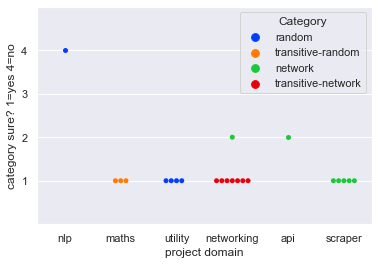

In [12]:
plt.figure()
f, ax = plt.subplots()
sbn.swarmplot(x='Project Domain', y='Category sure? 1=yes 4=no', data=df_NOD, hue='Category', ax=ax)
plt.xlabel('project domain')
plt.ylabel('category sure? 1=yes 4=no')
ax.set_ylim(0,5)
ax.set_yticks(range(1,5))
if savefig:
    plt.savefig('./figures/NOD_types.png', dpi=1200)


network                              7
transitive-network                   7
random                               5
transitive-random                    3
transitive-non-idempotent-outcome    2
non-idempotent-outcome               1
Name: Category, dtype: int64


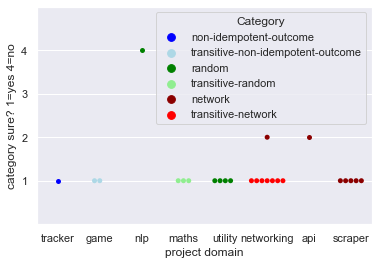

In [13]:
df_NOD_from_ODrun = pd.read_csv(flapy_NOD_from_OD_run)
df_NOD_from_ODrun

all_NODs = pd.concat([df_NOD_from_ODrun, df_NOD])

f, ax = plt.subplots()
sbn.swarmplot(x='Project Domain', y='Category sure? 1=yes 4=no', data=all_NODs, hue='Category', ax=ax, palette=['blue', 'lightblue', 'green', 'lightgreen', 'darkred', 'red'])
plt.xlabel('project domain')
plt.ylabel('category sure? 1=yes 4=no')
ax.set_ylim(0,5)
ax.set_yticks(range(1,5))
print(all_NODs['Category'].value_counts())
if savefig:
    plt.savefig('./figures/NOD_types_nio.png', dpi=1200)